In [1]:
import observational_fear.load as load
from observational_fear.nbox_transforms import get_exp_phase
from observational_fear.events import get_block_starts
from pathlib import Path
from binit.align import align_around
import numpy as np
from neurobox.wide_transforms import resample

In [2]:

DATA_DIR = Path(r"C:\Users\roryl\repos\observational-fear\data")
SESSION = "day2"
df = load.load_traces(DATA_DIR, session=SESSION)
df = resample(df.set_index("time"), "100ms")
df = df.reset_index().melt(id_vars=["time"])

c:\users\roryl\repos\neurobox\neurobox\wide_transforms.py:111: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time"] = pd.to_timedelta(df.index, unit="s")


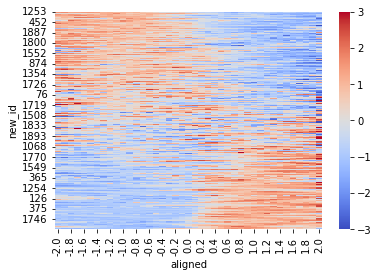

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from neurobox.wide_transforms import sort_by_activity_in_range


us_starts = get_block_starts(SESSION, "US")
# us_starts = np.array(np.random.choice(df["time"], 30))
# df["value_shuffled"] = df.groupby("new_id")["value"].transform(np.random.permutation)
df["aligned"] = np.round(align_around(df["time"].values, us_starts, t_before=2, max_latency=2), 2)
dfp = df.pivot_table(columns="new_id", values="value", index="aligned")
dfp = dfp.apply(zscore, axis=0)
dfp = sort_by_activity_in_range(dfp, 0, 1, agg_func=np.median)
sns.heatmap(dfp.transpose(), cmap="coolwarm", vmin=-3, vmax=3)
plt.show()
